In [308]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)
matplotlib.rc("font", size=14)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

df1 = pd.read_excel('./DDS9_Data_Extract_with_labels.xlsx')
df2 = pd.read_excel('./DDS10_Data_Extract_with_labels.xlsx')
df3 = pd.read_excel('./DDS11_Data_Extract_with_labels.xlsx')

In [309]:
# df1.fillna(0, inplace=True)
# df2.fillna(0, inplace=True)
# df3.fillna(0, inplace=True)

In [310]:
BaseDemographic = ['Age Range', 'Employment Status', 'Ethnicity', 'Gender', 'Region', 'State']

ChildDemographics = ['HasChildren', 'Children 10to13', 'Children 14to18', 'Children 19to25', 
                     'Children 26Up', 'Children 5to9', 'Children under 4']

FrequentApps = ['FrequentApp-Banking', 'FrequentApp-Books', 'FrequentApp-Browser', 
                'FrequentApp-Business', 'FrequentApp-Dating', 'FrequentApp-Education', 
                'FrequentApp-Food', 'FrequentApp-Games', 'FrequentApp-Health', 
                'FrequentApp-Hobbies', 'FrequentApp-Language', 'FrequentApp-Location', 
                'FrequentApp-Magazines', 'FrequentApp-Messaging', 'FrequentApp-Movie', 
                'FrequentApp-Music', 'FrequentApp-Navigation', 'FrequentApp-News', 
                'FrequentApp-Newspaper', 'FrequentApp-None', 'FrequentApp-Photo', 
                'FrequentApp-Productivity', 'FrequentApp-QRReader', 'FrequentApp-Reservations', 
                'FrequentApp-Retail', 'FrequentApp-Reviews', 'FrequentApp-SocialMedia', 
                'FrequentApp-Sports', 'FrequentApp-Tickets', 'FrequentApp-Transport', 
                'FrequentApp-Travel', 'FrequentApp-Unknown', 'FrequentApp-Utilities', 
                'FrequentApp-VOIP', 'FrequentApp-VideoStreaming', 'FrequentApp-Weather']

HasItems = ['Has3dPrinter', 'HasBasicPhone', 'HasBluRay', 'HasDVR', 'HasDesktop', 
           'HasDrone', 'HasEReader', 'HasFitnessBand', 'HasFlatPanelTelevision', 'HasGamingConsole', 
           'HasLaptop', 'HasLaptopHybrid', 'HasLargeSmartphone', 'HasLargeTablet', 'HasNoDevices', 
           'HasOverAirDigitalTV', 'HasPortableGamingConsole', 'HasPortableStreaming', 'HasSmallSmartphone', 
           'HasSmallTablet', 'HasSmartGlasses', 'HasSmartPhone', 'HasSmartWatch', 'HasStreamingBox', 
           'HasTablet', 'HasThumbdrive', 'HasVRHeadSet', 'HasWirelessRouter']

PurchaseItems = ['Purchase3DPrinter', 'PurchaseBasicPhone', 'PurchaseBluRay', 'PurchaseDVR', 
                 'PurchaseDesktop', 'PurchaseDrone', 'PurchaseEReader', 'PurchaseFitnessBand', 
                 'PurchaseFlatPanelTelevision', 'PurchaseGamingConsole', 'PurchaseLaptop', 'PurchaseLaptopHybrid', 
                 'PurchaseLargeSmartphone', 'PurchaseLargeTablet', 'PurchaseNoDevices', 'PurchaseNone', 
                 'PurchaseOverAirDigitalTV', 'PurchasePortableGamingConsole', 'PurchaseSmallSmartphone', 'PurchaseSmallTablet', 
                 'PurchaseSmartGlasses', 'PurchaseSmartPhone', 'PurchaseSmartWatch', 'PurchaseStreamingBox', 
                 'PurchaseTablet', 'PurchaseThumbdrive', 'PurchaseUnknown', 
                 'PurchaseVRHeadset', 'PurchaseWirelessRouter']

valueItems = ['Value3DPrinter', 'ValueBasicPhone', 'ValueBlueRay', 'ValueDVR', 'ValueDesktop', 
              'ValueDrone', 'ValueEReader', 'ValueFitnessBand', 'ValueFlatPanelTelevision', 'ValueGamingConsole', 
              'ValueLaptop', 'ValueLaptopHybrid', 'ValueLargeSmartphone', 'ValueLargeTablet', 'ValueNetworkRouter', 
              'ValueOverAirTV', 'ValuePlaceHolder', 'ValuePlaceholder', 'ValuePortableGamingConsole', 'ValueSmallSmartphone', 
              'ValueSmallTablet', 'ValueSmartGlasses', 'ValueSmartPhone', 'ValueSmartWatch', 'ValueStreamingBox', 
              'ValueTablet', 'ValueThumbDrive', 'ValueVRHeadset']

TimeWatching = ['TimeWatchingMoviesPC', 'TimeWatchingMoviesSmartphone', 'TimeWatchingMoviesTV', 'TimeWatchingMoviesTablet',
                'TimeWatchingSportsPC', 'TimeWatchingSportsSmartphone', 'TimeWatchingSportsTV', 'TimeWatchingSportsTablet', 
                'TimeWatchingTvPC', 'TimeWatchingTvSmartphone', 'TimeWatchingTvTV', 'TimeWatchingTvTablet']



In [313]:
# replace all yes and nos
YesNoQuestions = [ChildDemographics, FrequentApps, HasItems,PurchaseItems]
flattenedYesNo = [val for sublist in YesNoQuestions for val in sublist]

for i in flattenedYesNo:
    if i in df1.columns:
        df1[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    if i in df2.columns:
        df2[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    if i in df3.columns:
        df3[i].replace(('Yes', 'No'), (1, 0), inplace=True)
    
    

# Correlating Item Ownership

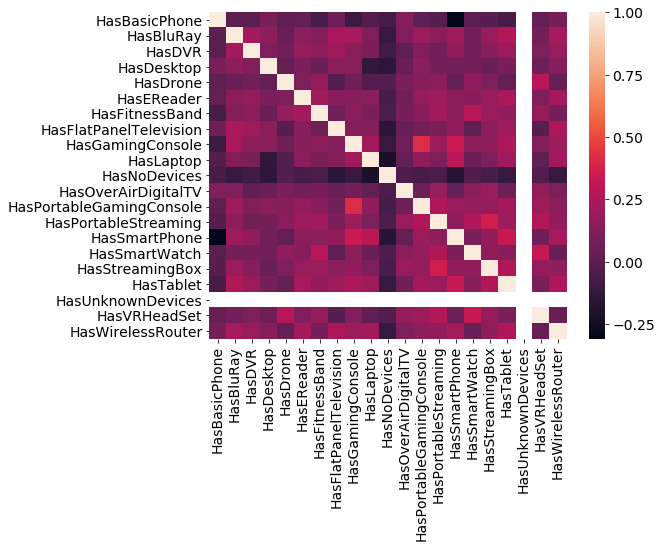

In [91]:
hasItems2 = np.intersect1d(HasItems, df2.columns)
hasItemMap2 = df2[hasItems2]
hasItemMap2.dropna(how='any')
corr = hasItemMap2.corr(method='spearman')
plt.clf()
sns.heatmap(corr)
plt.show()

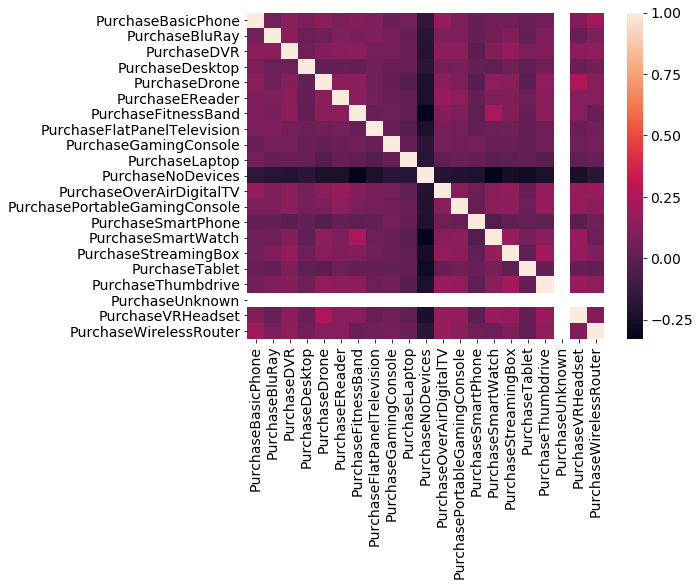

In [83]:
purchaseItems2 = np.intersect1d(PurchaseItems, df2.columns)
purchaseItemMap2 = df2[purchaseItems2]
purchaseItemMap2.dropna(how='any')
corr = purchaseItemMap2.corr()
plt.clf()
sns.heatmap(corr)
plt.show()

In [369]:
def Group_Age (row, ranges):
    if(row['Age'] <= ranges[0]):
        return 'Gen Z'
    if(row['Age'] > ranges[0] and row['Age'] <= ranges[1]):
        return 'Millenial'
    if(row['Age'] > ranges[1] and row['Age'] <= ranges[2]):
        return 'Gen X'
    if(row['Age'] > ranges[2] and row['Age'] <= ranges[3]):
        return 'Baby Boomer'
    if(row['Age'] > ranges[3]):
        return 'Mature'

df1['Age Group'] = df1.apply(lambda row: Group_Age(row, [13.0, 26.0, 43.0, 62.0]), axis=1)
df2['Age Group'] = df2.apply(lambda row: Group_Age(row, [14.0, 27.0, 44.0, 63.0]), axis=1)
df3['Age Group'] = df3.apply(lambda row: Group_Age(row, [15.0, 28.0, 45.0, 64.0]), axis=1)


In [385]:
maxSample = 2000
hasItems1 = np.intersect1d(HasItems, df1.columns)
hasItems2 = np.intersect1d(HasItems, df2.columns)
hasItems3 = np.intersect1d(HasItems, df3.columns)



AgeGroups = ['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer', 'Mature']

totalRep1 = df1['Age Group'][0:maxSample].value_counts().reset_index()
totalRep2 = df2['Age Group'][0:maxSample].value_counts().reset_index()
totalRep3 = df3['Age Group'][0:maxSample].value_counts().reset_index()

hasItems_2009 = df1[0:maxSample].groupby('Age Group')[hasItems1].sum()
hasItems_2010 = df2[0:maxSample].groupby('Age Group')[hasItems2].sum()
hasItems_2011 = df3[0:maxSample].groupby('Age Group')[hasItems3].sum()


print(hasItems_2011)

             HasBasicPhone  HasBluRay  HasDVR  HasDesktop  HasDrone  \
Age Group                                                             
Baby Boomer             70        168      99         171        10   
Gen X                   90        287     188         277        65   
Gen Z                    6         34      19          25         7   
Mature                 234        200     181         401         7   
Millenial               73        248     130         242        47   

             HasEReader  HasFitnessBand  HasFlatPanelTelevision  \
Age Group                                                         
Baby Boomer          54              49                     220   
Gen X               117             132                     268   
Gen Z                 7              10                      33   
Mature              119              47                     431   
Millenial           106             102                     216   

             HasGamingConsole  H

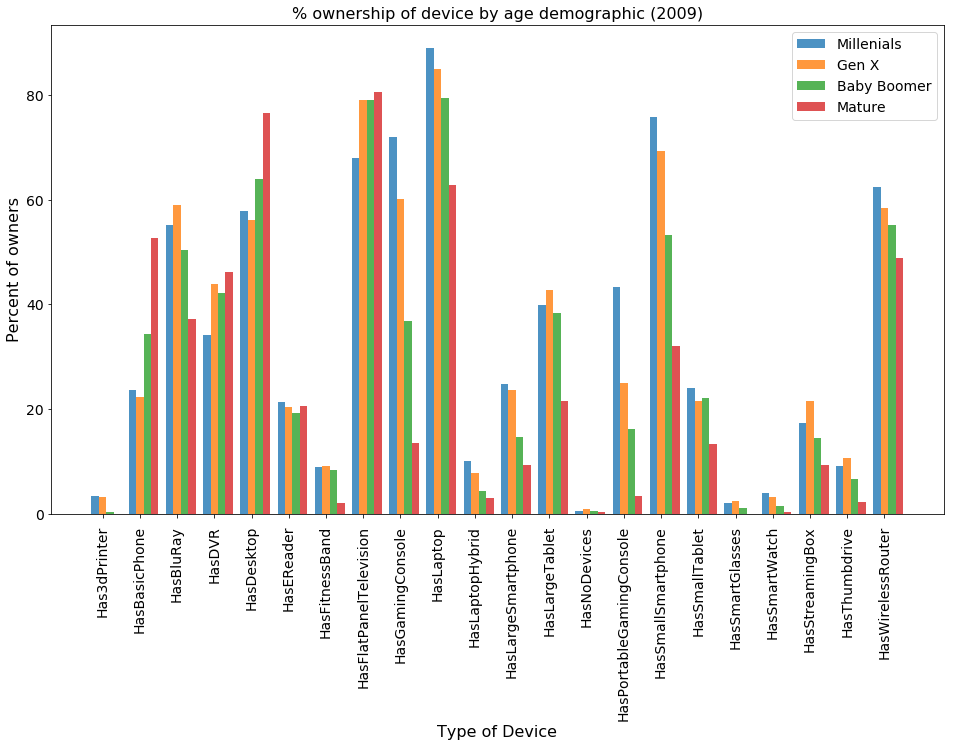

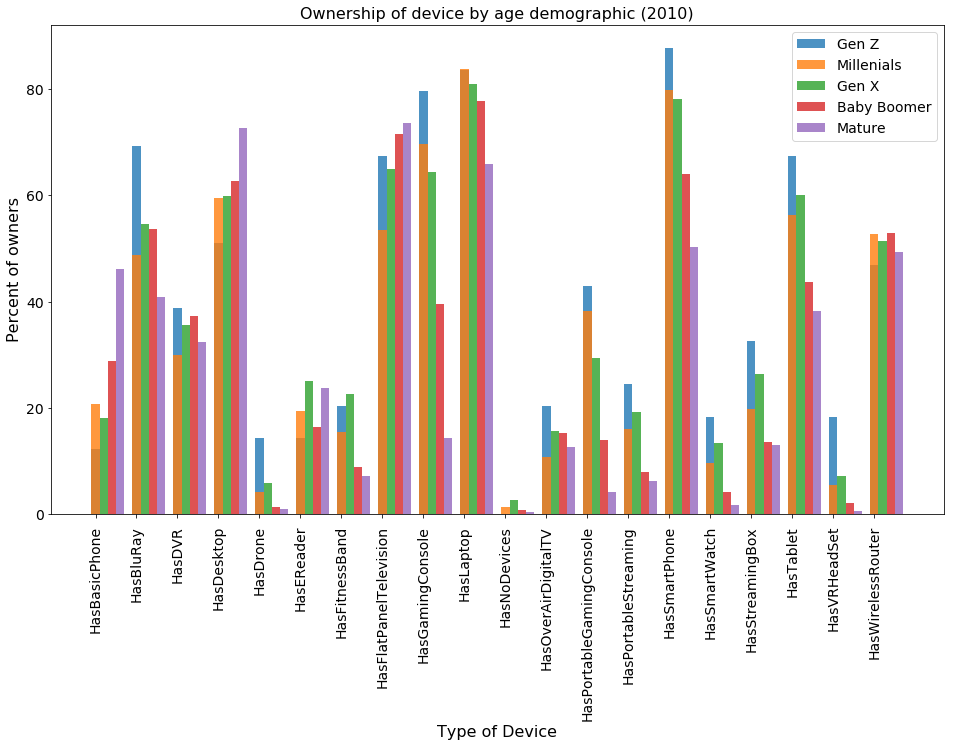

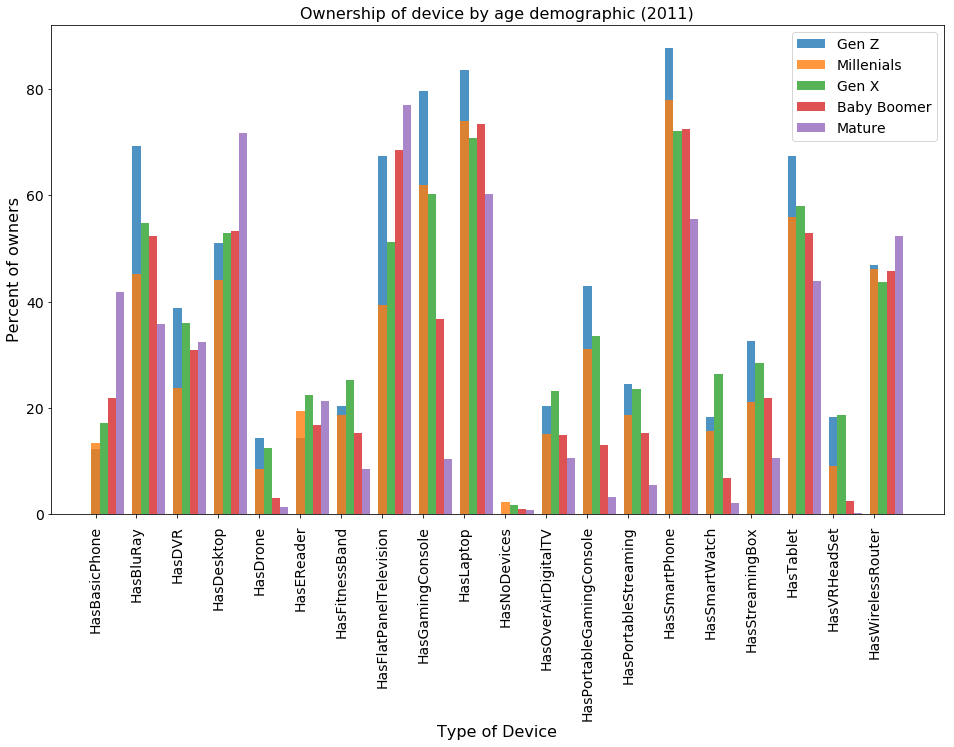

In [386]:
fig, ax = plt.subplots()
index = np.arange(len(hasItems1))
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index+ bar_width, hasItems_2009.iloc[3].apply(lambda x: x * 100 / totalRep1.iloc[0][1]), bar_width,
                 alpha=opacity, label='Millenials')

rects2 = plt.bar(index+ (2*bar_width), hasItems_2009.iloc[1].apply(lambda x: x * 100 / totalRep1.iloc[1][1]), bar_width,
                 alpha=opacity, label='Gen X')

rects3 = plt.bar(index+ (3*bar_width), hasItems_2009.iloc[0].apply(lambda x: x * 100 / totalRep1.iloc[2][1]), bar_width,
                 alpha=opacity, label='Baby Boomer')

rects3 = plt.bar(index+ (4*bar_width), hasItems_2009.iloc[2].apply(lambda x: x * 100 / totalRep1.iloc[3][1]), bar_width,
                 alpha=opacity, label='Mature')

plt.ylabel('Percent of owners')
plt.xlabel('Type of Device')
plt.title('% ownership of device by age demographic (2009)')
plt.xticks(index + (bar_width)*2, hasItems_2009.keys(), rotation = 90)
plt.legend()

plt.show()

index = np.arange(len(hasItems2)) 


rects1 = plt.bar(index+ bar_width, hasItems_2011.iloc[2].apply(lambda x: x * 100 / totalRep3.iloc[4][1]), bar_width,
                 alpha=opacity, label='Gen Z')

rects2 = plt.bar(index+ bar_width, hasItems_2010.iloc[4].apply(lambda x: x * 100 / totalRep2.iloc[0][1]), bar_width,
                 alpha=opacity, label='Millenials')

rects3 = plt.bar(index+ (2*bar_width), hasItems_2010.iloc[1].apply(lambda x: x * 100 / totalRep2.iloc[1][1]), bar_width,
                 alpha=opacity, label='Gen X')

rects4 = plt.bar(index+ (3*bar_width), hasItems_2010.iloc[0].apply(lambda x: x * 100 / totalRep2.iloc[2][1]), bar_width,
                 alpha=opacity, label='Baby Boomer')

rects5 = plt.bar(index+ (4*bar_width), hasItems_2010.iloc[3].apply(lambda x: x * 100 / totalRep2.iloc[3][1]), bar_width,
                 alpha=opacity, label='Mature')

plt.ylabel('Percent of owners')
plt.xlabel('Type of Device')
plt.title('Ownership of device by age demographic (2010)')
plt.xticks(index + (bar_width), hasItems_2010.keys(), rotation = 90)
plt.legend()

plt.show()

index = np.arange(len(hasItems3))


rects1 = plt.bar(index+ bar_width, hasItems_2011.iloc[2].apply(lambda x: x * 100 / totalRep3.iloc[4][1]), bar_width,
                 alpha=opacity, label='Gen Z')

rects2 = plt.bar(index+ bar_width, hasItems_2011.iloc[4].apply(lambda x: x * 100 / totalRep3.iloc[1][1]), bar_width,
                 alpha=opacity, label='Millenials')

rects3 = plt.bar(index+ (2*bar_width), hasItems_2011.iloc[1].apply(lambda x: x * 100 / totalRep3.iloc[2][1]), bar_width,
                 alpha=opacity, label='Gen X')

rects4 = plt.bar(index+ (3*bar_width), hasItems_2011.iloc[0].apply(lambda x: x * 100 / totalRep3.iloc[3][1]), bar_width,
                 alpha=opacity, label='Baby Boomer')

rects5 = plt.bar(index+ (4*bar_width), hasItems_2011.iloc[3].apply(lambda x: x * 100 / totalRep3.iloc[0][1]), bar_width,
                 alpha=opacity, label='Mature')

plt.ylabel('Percent of owners')
plt.xlabel('Type of Device')
plt.title('Ownership of device by age demographic (2011)')
plt.xticks(index + (bar_width), hasItems_2011.keys(), rotation = 90)
plt.legend()

plt.show()

In [347]:
# group items owned by ethnicity
hasItems_2009 = df1[0:2000].groupby('Ethnicity')[hasItems1].sum().apply(lambda x: x*100 / 2000)
hasItems_2010 = df2[0:2000].groupby('Ethnicity')[hasItems2].sum().apply(lambda x: x*100 / 2000)
hasItems_2011 = df3[0:2000].groupby('Ethnicity')[hasItems3].sum().apply(lambda x: x*100 / 2000)

# print(hasItems_2009)

# fig, ax = plt.subplots()
# index = np.arange(len(hasItems1))
# bar_width = 0.2
# opacity = 0.8

# for type in np.unique(df1['Ethnicity']):
# rects = plt.bar(index+ bar_width, hasItems2009, bar_width,
#                  alpha=opacity, label='Ethnicity')

# plt.ylabel('Percent of owners')
# plt.xlabel('Type of Device')
# plt.title('Ownership of device by age demographic (2009)')
# plt.xticks(index + (bar_width)*2, hasItems_2009.keys(), rotation = 90)
# plt.legend()

# plt.show()